In [1]:
from astropy.io import fits
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
#HoS Pre
hosprecor = fits.open('NSC306M-catS12-Pre-corr-anonp.fits')
hosprecor.close
data = hosprecor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
hospredf = DataFrame(corrs, index = anons)
num = len(hospredf.columns)
hospredf['Score']=hospredf.sum(axis=1)
hospredf['Percent']=hospredf['Score']/num*100.
hospredf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
720593,1,0,1,0,0,1,0,1,1,1,...,1,0,1,0,0,1,0,1,19,47.5
304917,1,1,1,1,1,0,1,1,0,1,...,0,1,1,0,1,0,0,0,23,57.5
709488,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,30,75.0
743883,0,1,1,0,1,1,0,1,1,1,...,1,0,1,0,1,0,1,1,25,62.5
890246,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,32,80.0


In [3]:
#HoS Post
hospostcor = fits.open('NSC306M-catS12-Post-corr-anonp.fits')
hospostcor.close
data = hospostcor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
hospostdf = DataFrame(corrs, index = anons)
num = len(hospostdf.columns)
hospostdf['Score']=hospostdf.sum(axis=1)
hospostdf['Percent']=hospostdf['Score']/num*100.
hospostdf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
720593,1,1,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,0,27,67.5
304917,1,1,0,0,1,0,0,1,0,1,...,1,1,1,0,1,1,0,1,30,75.0
709488,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,35,87.5
743883,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,33,82.5
890246,1,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,1,35,87.5


In [4]:
#AST Pre
astprecor = fits.open('ctrlAST-catS12-Pre-corr-anonp.fits')
astprecor.close
data = astprecor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
astpredf = DataFrame(corrs, index = anons)
num = len(astpredf.columns)
astpredf['Score']=astpredf.sum(axis=1)
astpredf['Percent']=astpredf['Score']/num*100.
astpredf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
59834,1,1,0,1,0,1,0,1,1,1,...,0,1,1,0,0,1,1,1,24,60.0
6934,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,0,1,1,1,25,62.5
547019,1,1,1,0,1,1,0,0,1,1,...,1,1,1,0,1,1,0,0,27,67.5
758232,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,1,0,1,1,18,45.0
650189,1,0,1,0,0,1,0,0,0,1,...,1,1,1,0,0,1,1,1,24,60.0


In [5]:
#AST Post
astpostcor = fits.open('ctrlAST-catS12-Post-corr-anonp.fits')
astpostcor.close
data = astpostcor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
astpostdf = DataFrame(corrs, index = anons)
num = len(astpostdf.columns)
astpostdf['Score']=astpostdf.sum(axis=1)
astpostdf['Percent']=astpostdf['Score']/num*100.
astpostdf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
59834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6934,0,1,1,0,1,1,0,1,1,1,...,1,1,0,0,1,1,1,0,27,67.5
547019,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,33,82.5
758232,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,0,1,1,28,70.0
650189,1,1,1,0,0,0,0,1,1,1,...,1,1,1,0,1,0,1,1,27,67.5


In [6]:
hospredf['Class']='HoS'
hospostdf['Class']='HoS'
astpredf['Class']='Ast'
astpostdf['Class']='Ast'
totpre = pd.concat([hospredf,astpredf])
totpost = pd.concat([hospostdf,astpostdf])

In [7]:
#questions sorted by topic (in 40Q numbering), minus 1 to conv to zero index
light = np.array([27,28,29])-1
scale = np.array([9,10,12,17,18,19,21,24])-1
sky = np.array([4,5,7,11,14,20])-1
seasons = np.array([1,16,33])-1
phases = np.array([2,13,25,26])-1
weather = np.array([34,37,40])-1

In [8]:
chpre = DataFrame(totpre[light].sum(axis=1)/len(light),columns=['Light'],index=totpre.index)
chpre['Scale'] = totpre[scale].sum(axis=1)/len(scale)
chpre['Sky'] = totpre[sky].sum(axis=1)/len(sky)
chpre['Seasons'] = totpre[seasons].sum(axis=1)/len(seasons)
chpre['Phases'] = totpre[phases].sum(axis=1)/len(phases)
chpre['Weather'] = totpre[weather].sum(axis=1)/len(weather)
chpre['Class'] = totpre['Class']
chpost = DataFrame(totpost[light].sum(axis=1)/len(light),columns=['Light'],index=totpre.index)
chpost['Scale'] = totpost[scale].sum(axis=1)/len(scale)
chpost['Sky'] = totpost[sky].sum(axis=1)/len(sky)
chpost['Seasons'] = totpost[seasons].sum(axis=1)/len(seasons)
chpost['Phases'] = totpost[phases].sum(axis=1)/len(phases)
chpost['Weather'] = totpost[weather].sum(axis=1)/len(weather)
chpost['Class'] = totpost['Class']

For PCA, I want Pre & g per topic per student, only HoS for now.  Since Pre and Post are correlated, it's not useful to include both (in fact will obscure other meaningful results).  So, starting point and where you went from there, up, down, or no change.

In [9]:
PCAdata = chpre[chpre.Class=='HoS']
chpostH = chpost[chpost.Class=='HoS']
del PCAdata['Class']

In [10]:
PCAdata['gLight'] = (chpostH.Light-PCAdata.Light)
PCAdata['gScale'] = (chpostH.Scale-PCAdata.Scale)
PCAdata['gSky'] = (chpostH.Sky-PCAdata.Sky)
PCAdata['gSeasons'] = (chpostH.Seasons-PCAdata.Seasons)
PCAdata['gPhases'] = (chpostH.Phases-PCAdata.Phases)
PCAdata['gWeather'] = (chpostH.Weather-PCAdata.Weather)

/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [11]:
PCAdata.head()

,Light,Scale,Sky,Seasons,Phases,Weather,gLight,gScale,gSky,gSeasons,gPhases,gWeather
720593,0.666667,0.375,0.166667,1.000000,0.50,0.333333,0.000000,0.500,0.500000,0.000000,0.25,0.333333
304917,0.333333,0.625,0.833333,0.666667,0.50,0.666667,0.000000,0.250,-0.166667,0.333333,0.50,0.333333
709488,0.666667,0.750,1.000000,1.000000,0.75,0.666667,0.000000,0.250,-0.166667,0.000000,0.00,0.333333
743883,0.666667,0.875,0.500000,0.666667,0.25,0.666667,0.000000,0.125,0.333333,0.333333,0.75,0.333333
890246,0.333333,1.000,0.666667,1.000000,0.75,0.666667,0.333333,-0.125,0.166667,0.000000,0.25,0.333333


In [12]:
chpostH.head()

,Light,Scale,Sky,Seasons,Phases,Weather,Class
720593,0.666667,0.875,0.666667,1,0.75,0.666667,HoS
304917,0.333333,0.875,0.666667,1,1.00,1.000000,HoS
709488,0.666667,1.000,0.833333,1,0.75,1.000000,HoS
743883,0.666667,1.000,0.833333,1,1.00,1.000000,HoS
890246,0.666667,0.875,0.833333,1,1.00,1.000000,HoS


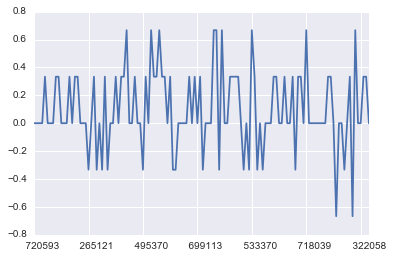

In [13]:
PCAdata.gLight.plot()

In [14]:
pca=PCA()

In [15]:
pca.fit(PCAdata)

PCA(copy=True, n_components=None, whiten=False)

In [16]:
np.cumsum(np.round(pca.explained_variance_ratio_,4))*100

array([  22.89,   39.41,   54.28,   67.25,   78.72,   87.44,   91.3 ,
         94.01,   96.19,   97.69,   99.03,  100.01])

In [17]:
var = np.round(pca.explained_variance_ratio_,3)*100
varperc = [str(v)+' %' for v in var]
varperc

['22.9 %',
 '16.5 %',
 '14.9 %',
 '13.0 %',
 '11.5 %',
 '8.7 %',
 '3.9 %',
 '2.7 %',
 '2.2 %',
 '1.5 %',
 '1.3 %',
 '1.0 %']

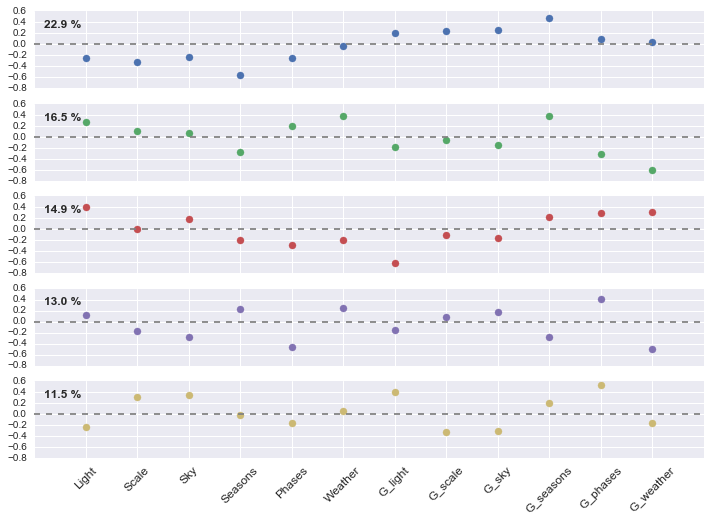

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(511)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]

Qstr = ['','Light','Scale','Sky','Seasons','Phases','Weather','G_light','G_scale','G_sky','G_seasons','G_phases','G_weather']
x=range(len(Qstr)-1)
ax.scatter(x,pca.components_[0],color=col1,s=50)
ax.axhline(0,color='gray',ls='--')
plt.setp(ax.get_xticklabels(), visible=False)
ax.text(-.8,0.3,varperc[0],fontsize='large',fontweight='bold')

ax2 = fig.add_subplot(512,sharex=ax,sharey=ax)
ax2.scatter(x,pca.components_[1],color=col2,s=50)
ax2.axhline(0,color='gray',ls='--')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(-.8,0.3,varperc[1],fontsize='large',fontweight='bold')

ax3 = fig.add_subplot(513,sharex=ax,sharey=ax)
ax3.scatter(x,pca.components_[2],color=palette[2],s=50)
ax3.axhline(0,color='gray',ls='--')
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(-.8,0.3,varperc[2],fontsize='large',fontweight='bold')

ax4 = fig.add_subplot(514,sharex=ax,sharey=ax)
ax4.scatter(x,pca.components_[3],color=palette[3],s=50)
ax4.axhline(0,color='gray',ls='--')
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.text(-.8,0.3,varperc[3],fontsize='large',fontweight='bold')

ax5 = fig.add_subplot(515,sharex=ax,sharey=ax)
ax5.scatter(x,pca.components_[4],color=palette[4],s=50)
ax5.axhline(0,color='gray',ls='--')
ax5.text(-.8,0.3,varperc[4],fontsize='large',fontweight='bold')

ax.xaxis.set_major_locator(MaxNLocator(len(Qstr)+1))
ax5.set_xticklabels(Qstr,rotation=45,fontsize='large')
ax.set_xlim(-1,12)
ax.set_ylim(-0.8,.6)

fig.savefig('PCApreG.pdf')

In [19]:
## check weights for scatter/noncorrelation
weights = pca.fit_transform(PCAdata)
weights[:5]

array([[  6.76142856e-02,  -5.25696509e-01,   6.22068548e-05,
          2.79045897e-02,  -6.54514035e-01,  -4.61577430e-02,
         -7.83453593e-02,  -2.97415933e-01,   8.15479825e-02,
          1.20809186e-01,   7.60017384e-02,  -1.01755719e-01],
       [  3.96289295e-02,  -1.66043092e-01,   2.65621480e-01,
         -3.66106534e-01,   2.49322383e-01,   3.05188392e-01,
          8.61201279e-03,   5.71825871e-02,  -1.93116597e-01,
          1.59376226e-01,  -3.22518870e-02,  -5.05686779e-02],
       [ -5.79941398e-01,  -5.69991527e-02,   7.51053753e-02,
         -5.45615575e-01,  -1.09994597e-01,   3.31538346e-01,
          1.98928510e-03,  -9.70731372e-03,   4.68047094e-02,
          5.34903198e-02,  -1.45335563e-01,   4.46948991e-02],
       [  1.47954804e-01,  -2.69223470e-01,   4.21599116e-01,
          1.87921634e-02,   1.89374130e-01,  -2.95529728e-01,
          1.93332485e-01,  -1.05652574e-01,   7.26482691e-03,
          7.05039539e-02,  -1.03877795e-01,  -9.76456835e-02],
    

In [20]:
weights[:,0]

array([ 0.06761429,  0.03962893, -0.5799414 ,  0.1479548 , -0.41054225,
       -0.06523373,  0.22302253,  0.06624063,  0.07365652,  0.09378421,
        0.23906805, -0.15919842, -0.24089175, -0.01277358, -0.36666885,
        1.16465912, -0.22702435, -0.43122469, -0.10767758, -0.12734976,
       -0.32118929, -0.23451347,  0.0546071 , -0.3025634 ,  0.65626892,
        0.66026382,  0.25224309,  0.29083855, -0.82032141, -0.08807042,
        0.2158448 , -0.23564911,  0.55792538,  0.40238921,  1.02927033,
        0.04892595,  0.54729902,  0.17502685, -0.73901543, -0.14386003,
       -0.17435747,  0.37972073, -0.33248494,  0.05791515,  0.16473698,
       -0.10287591,  0.33707855,  0.51518819, -0.3870315 ,  0.29520084,
        0.23238485, -0.2995664 , -0.18974325,  0.64326305,  0.74695127,
        0.3335388 , -0.01522788,  0.63850448, -0.38730315,  0.11451832,
       -0.14182995,  0.29711396,  0.67820845, -0.34924501,  0.64828143,
       -0.57607949,  1.23746067, -0.20097264, -0.60179389,  0.13

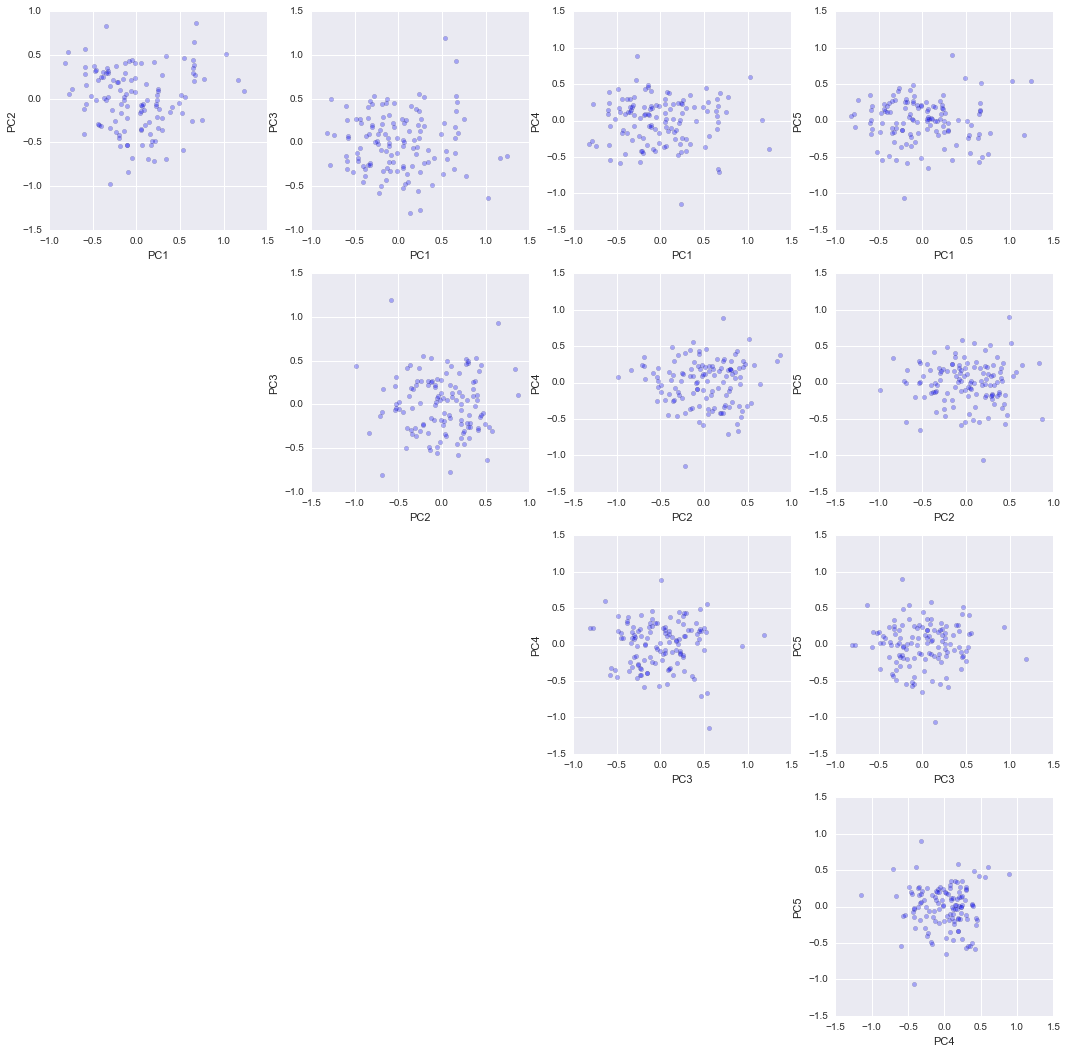

In [21]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(441)
ax.scatter(weights[:,0],weights[:,1], alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax2 = fig.add_subplot(442)
ax2.scatter(weights[:,0],weights[:,2], alpha=0.3)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')

ax3 = fig.add_subplot(443)
ax3.scatter(weights[:,0],weights[:,3], alpha=0.3)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC4')

ax4 = fig.add_subplot(444)
ax4.scatter(weights[:,0],weights[:,4], alpha=0.3)
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC5')

ax6 = fig.add_subplot(446)
ax6.scatter(weights[:,1],weights[:,2], alpha=0.3)
ax6.set_xlabel('PC2')
ax6.set_ylabel('PC3')

ax7 = fig.add_subplot(447)
ax7.scatter(weights[:,1],weights[:,3], alpha=0.3)
ax7.set_xlabel('PC2')
ax7.set_ylabel('PC4')

ax8 = fig.add_subplot(448)
ax8.scatter(weights[:,1],weights[:,4], alpha=0.3)
ax8.set_xlabel('PC2')
ax8.set_ylabel('PC5')

ax11 = fig.add_subplot(4,4,11)
ax11.scatter(weights[:,2],weights[:,3], alpha=0.3)
ax11.set_xlabel('PC3')
ax11.set_ylabel('PC4')

ax12 = fig.add_subplot(4,4,12)
ax12.scatter(weights[:,2],weights[:,4], alpha=0.3)
ax12.set_xlabel('PC3')
ax12.set_ylabel('PC5')

ax16 = fig.add_subplot(4,4,16)
ax16.scatter(weights[:,3],weights[:,4], alpha=0.3)
ax16.set_xlabel('PC4')
ax16.set_ylabel('PC5')

fig.savefig('PCAweights.pdf')

# Add total pregrade, tot G

In [22]:
grade = totpre[totpre.Class=='HoS']['Percent']/100
Ggrade = totpost[totpost.Class=='HoS']['Percent']/100-totpre[totpre.Class=='HoS']['Percent']/100

In [23]:
PCAdata['Grade'] = grade
PCAdata['G_grade'] = Ggrade

/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
PCAdata[:10]

,Light,Scale,Sky,Seasons,Phases,Weather,gLight,gScale,gSky,gSeasons,gPhases,gWeather,Grade,G_grade
720593,0.666667,0.375,0.166667,1.000000,0.50,0.333333,0.000000,0.500,0.500000,0.000000,0.25,0.333333,0.475,0.200
304917,0.333333,0.625,0.833333,0.666667,0.50,0.666667,0.000000,0.250,-0.166667,0.333333,0.50,0.333333,0.575,0.175
709488,0.666667,0.750,1.000000,1.000000,0.75,0.666667,0.000000,0.250,-0.166667,0.000000,0.00,0.333333,0.750,0.125
743883,0.666667,0.875,0.500000,0.666667,0.25,0.666667,0.000000,0.125,0.333333,0.333333,0.75,0.333333,0.625,0.200
890246,0.333333,1.000,0.666667,1.000000,0.75,0.666667,0.333333,-0.125,0.166667,0.000000,0.25,0.333333,0.800,0.075
568350,0.666667,1.000,0.666667,0.666667,0.50,0.666667,0.000000,0.000,0.333333,0.333333,0.50,0.000000,0.725,0.150
693374,0.333333,0.375,0.833333,0.666667,0.25,0.666667,0.000000,0.125,0.166667,0.333333,0.50,0.000000,0.550,0.075
680754,0.666667,0.875,0.500000,0.666667,0.50,0.333333,0.000000,0.000,0.500000,0.333333,0.50,0.000000,0.575,0.225
453705,0.333333,0.250,0.666667,1.000000,0.50,1.000000,0.333333,0.500,0.333333,0.000000,0.50,-0.333333,0.525,0.225
389187,0.333333,0.625,0.333333,1.000000,0.25,1.000000,0.333333,0.250,0.500000,0.000000,0.50,0.000000,0.550,0.175


In [25]:
pcagrade = PCA()
pcagrade.fit(PCAdata)
np.cumsum(np.round(pcagrade.explained_variance_ratio_,4))*100

array([ 23.86,  40.14,  54.57,  67.23,  78.45,  86.91,  91.05,  93.77,
        95.88,  97.33,  98.67,  99.63,  99.92,  99.99])

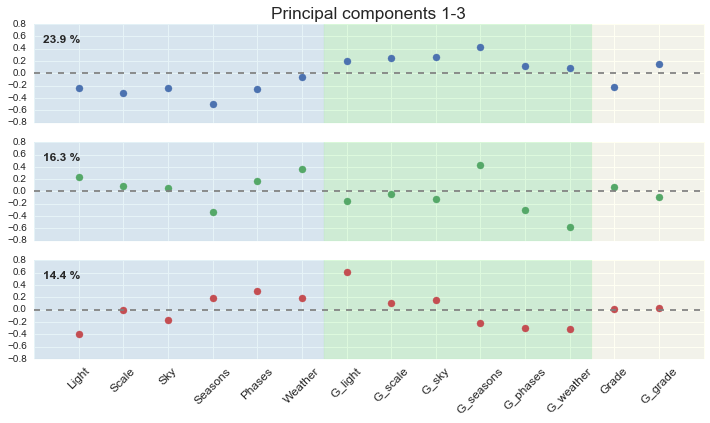

In [38]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(311)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]

Qstr = ['','Light','Scale','Sky','Seasons','Phases','Weather','G_light','G_scale','G_sky','G_seasons','G_phases','G_weather','Grade','G_grade']
var = np.round(pcagrade.explained_variance_ratio_,3)*100
varperc = [str(v)+' %' for v in var]
x=range(len(Qstr)-1)
xch = [s-1.5 for s in x[:8]]
xg = [s+0.5 for s in x[5:-2]]
xs = [s+1.5 for s in x[-4:]]

ax.fill_between(xch,-0.8,0.8,color='lightblue',alpha=0.3)
ax.fill_between(xg,-0.8,0.8,color='lightgreen',alpha=0.3)
ax.fill_between(xs,-0.8,0.8,color='lightyellow',alpha=0.4)
ax.scatter(x,pcagrade.components_[0],color=col1,s=50)
ax.axhline(0,color='gray',ls='--')
plt.setp(ax.get_xticklabels(), visible=False)
ax.text(-.8,0.5,varperc[0],fontsize='large',fontweight='bold')

ax2 = fig.add_subplot(312,sharex=ax,sharey=ax)
ax2.fill_between(xch,-0.8,0.8,color='lightblue',alpha=0.3)
ax2.fill_between(xg,-0.8,0.8,color='lightgreen',alpha=0.3)
ax2.fill_between(xs,-0.8,0.8,color='lightyellow',alpha=0.4)
ax2.scatter(x,pcagrade.components_[1],color=col2,s=50)
ax2.axhline(0,color='gray',ls='--')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(-.8,0.5,varperc[1],fontsize='large',fontweight='bold')

ax3 = fig.add_subplot(313,sharex=ax,sharey=ax)
ax3.fill_between(xch,-0.8,0.8,color='lightblue',alpha=0.3)
ax3.fill_between(xg,-0.8,0.8,color='lightgreen',alpha=0.3)
ax3.fill_between(xs,-0.8,0.8,color='lightyellow',alpha=0.4)
ax3.scatter(x,pcagrade.components_[2],color=palette[2],s=50)
ax3.axhline(0,color='gray',ls='--')
ax3.text(-.8,0.5,varperc[2],fontsize='large',fontweight='bold')

ax.xaxis.set_major_locator(MaxNLocator(len(Qstr)+1))
ax3.set_xticklabels(Qstr,rotation=45,fontsize='large')
ax.set_title('Principal components 1-3',fontsize='xx-large')
ax.set_xlim(-1,14)
ax.set_ylim(-0.8,.8)

fig.savefig('PCAgrade.pdf')

# Just PCA on chapters gains, tot G

In [27]:
del PCAdata['Light']
del PCAdata['Scale']
del PCAdata['Sky']
del PCAdata['Seasons']
del PCAdata['Phases']
del PCAdata['Weather']
del PCAdata['Grade']

In [28]:
PCAdata.head()

,gLight,gScale,gSky,gSeasons,gPhases,gWeather,G_grade
720593,0.000000,0.500,0.500000,0.000000,0.25,0.333333,0.200
304917,0.000000,0.250,-0.166667,0.333333,0.50,0.333333,0.175
709488,0.000000,0.250,-0.166667,0.000000,0.00,0.333333,0.125
743883,0.000000,0.125,0.333333,0.333333,0.75,0.333333,0.200
890246,0.333333,-0.125,0.166667,0.000000,0.25,0.333333,0.075


In [29]:
pcagains = PCA()
pcagains.fit(PCAdata)
np.cumsum(np.round(pcagains.explained_variance_ratio_,4))*100

array([  22.5 ,   44.37,   61.7 ,   77.57,   89.83,   99.56,  100.01])

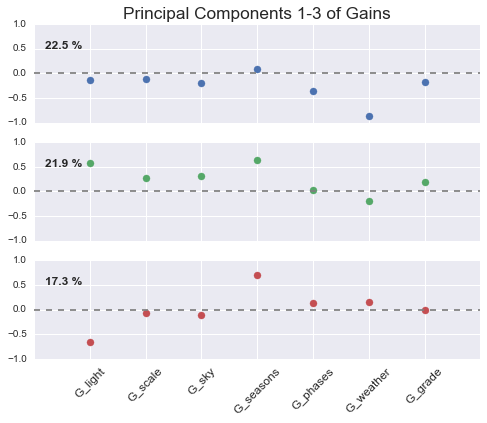

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(311)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]

Qstr = ['','G_light','G_scale','G_sky','G_seasons','G_phases','G_weather','G_grade']
var = np.round(pcagains.explained_variance_ratio_,3)*100
varperc = [str(v)+' %' for v in var]
x=range(len(Qstr)-1)
xch = [s-1.5 for s in x[:8]]
xg = [s+0.5 for s in x[5:-2]]
xs = [s+1.5 for s in x[-4:]]

ax.scatter(x,pcagains.components_[0],color=col1,s=50)
ax.axhline(0,color='gray',ls='--')
plt.setp(ax.get_xticklabels(), visible=False)
ax.text(-.8,0.5,varperc[0],fontsize='large',fontweight='bold')

ax2 = fig.add_subplot(312,sharex=ax,sharey=ax)
ax2.scatter(x,pcagains.components_[1],color=col2,s=50)
ax2.axhline(0,color='gray',ls='--')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(-.8,0.5,varperc[1],fontsize='large',fontweight='bold')

ax3 = fig.add_subplot(313,sharex=ax,sharey=ax)
ax3.scatter(x,pcagains.components_[2],color=palette[2],s=50)
ax3.axhline(0,color='gray',ls='--')
ax3.text(-.8,0.5,varperc[2],fontsize='large',fontweight='bold')

ax.xaxis.set_major_locator(MaxNLocator(len(Qstr)+1))
ax3.set_xticklabels(Qstr,rotation=45,fontsize='large')
ax.set_title('Principal Components 1-3 of Gains',fontsize='xx-large')
ax.set_xlim(-1,7)
ax.set_ylim(-1,1)

fig.savefig('PCAgains.pdf')